# The Pearson Correlation Between each features in Discharge cycle and Capacity

Pearson Correlation Matrix:
+-------------------------+----------------+---------------+--------------------+--------------------+-----------------------+----------------------+---------------------------+---------------------------+------------------+------------+-----------------+-------------------+--------------+--------------+
|                         |   voltage mean |   voltage std |   voltage kurtosis |   voltage skewness |   CC_temperature mean |   CC_temperature std |   CC_temperature kurtosis |   CC_temperature skewness |   CC charge time |       CC Q |   voltage slope |   voltage entropy |     capacity |   Cycle Life |
|-------------------------+----------------+---------------+--------------------+--------------------+-----------------------+----------------------+---------------------------+---------------------------+------------------+------------+-----------------+-------------------+--------------+--------------|
| voltage mean            |      1         |    -0.207

/var/folders/rx/sf9l7p51187c9twd53tg_ss00000gn/T/ipykernel_11722/1973954179.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pearson_corr.values, y=pearson_corr.index, palette="viridis")


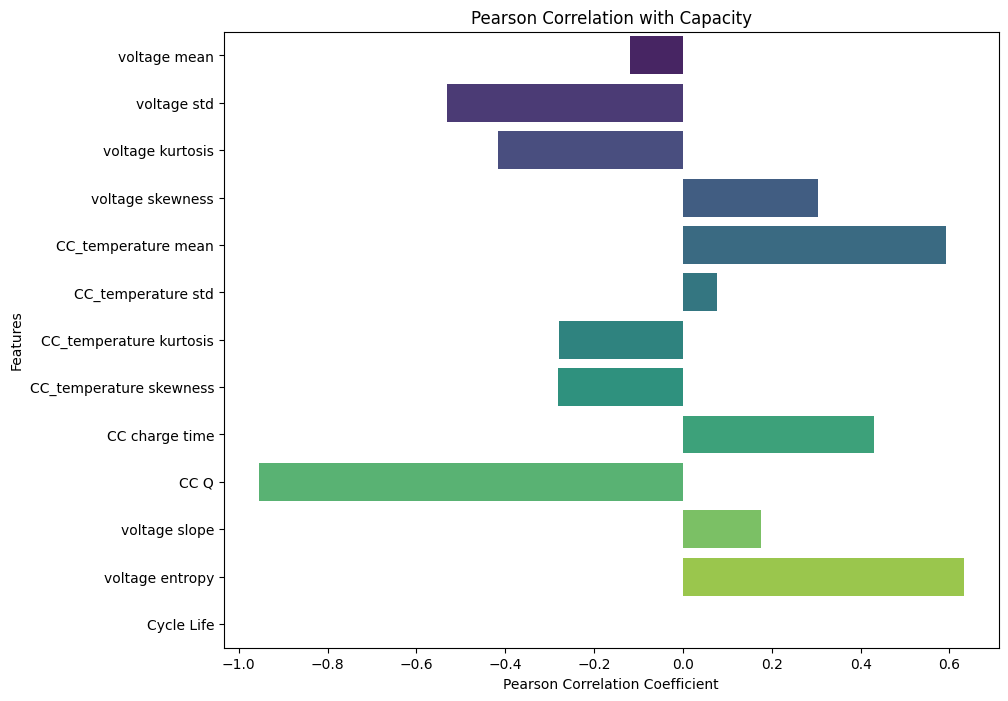

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

def load_features(batch_folder):
    files = [f for f in os.listdir(batch_folder) if f.endswith('_features.csv')]
    all_data = []

    for file in files:
        file_path = os.path.join(batch_folder, file)
        data = pd.read_csv(file_path)
        all_data.append(data)

    return pd.concat(all_data, ignore_index=True)

# 电池Batch信息
Batch1 = ['B0005', 'B0006', 'B0007', 'B0018']
Batch2 = ['B0025', 'B0026', 'B0027', 'B0028']
Batch3 = ['B0029', 'B0030', 'B0031', 'B0032']
Batch4 = ['B0033', 'B0034', 'B0036']
Batch5 = ['B0038', 'B0039', 'B0040']
Batch6 = ['B0041', 'B0042', 'B0043', 'B0044']
Batch7 = ['B0045', 'B0046', 'B0047', 'B0048']
Batch8 = ['B0049', 'B0050', 'B0051', 'B0052']

# recreate the above information into a dictionary
Batch = {'Batch1': Batch1, 'Batch2': Batch2, 'Batch3': Batch3, 'Batch4': Batch4, 'Batch5': Batch5, 'Batch6': Batch6, 'Batch7': Batch7, 'Batch8': Batch8}

# 设置文件夹路径
output_folder = '/Users/jonathanzha/Desktop/Battery-dataset-preprocessing-code-library/NASA/DischargeOutput'

all_data = []

for batch in Batch:
    batch_folder = os.path.join(output_folder, batch)
    if os.path.exists(batch_folder):
        batch_data = load_features(batch_folder)
        all_data.append(batch_data)

# Combine all data into one DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# Calculate Pearson correlation coefficients
correlation_matrix = combined_data.corr()
pearson_corr = correlation_matrix['capacity'].drop('capacity')

# Display the correlation matrix using tabulate
print("Pearson Correlation Matrix:")
print(tabulate(correlation_matrix, headers='keys', tablefmt='psql'))

# Plotting the Pearson correlation coefficients
plt.figure(figsize=(10, 8))
sns.barplot(x=pearson_corr.values, y=pearson_corr.index, palette="viridis")
plt.title('Pearson Correlation with Capacity')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Features')
plt.show()


In [2]:
import pandas as pd
import os

def find_complex_columns(batch_folder):
    files = [f for f in os.listdir(batch_folder) if f.endswith('_Merged_discharge+impedance.csv')]
    complex_columns_files = {}

    for file in files:
        file_path = os.path.join(batch_folder, file)
        data = pd.read_csv(file_path)
        
        for col in data.columns:
            # Check if the column contains complex numbers
            if data[col].dtype == object:
                try:
                    # Attempt to split and convert to float to check if it's a complex number
                    data[col].apply(lambda x: float(str(x).split('+')[0]))
                    data[col].apply(lambda x: float(str(x).split('+')[1].replace('i', '').strip()))
                    if file not in complex_columns_files:
                        complex_columns_files[file] = []
                    complex_columns_files[file].append(col)
                except:
                    pass

    return complex_columns_files

# 电池Batch信息
Batch = {
    'Batch1': ['B0005', 'B0006', 'B0007', 'B0018'],
    'Batch2': ['B0025', 'B0026', 'B0027', 'B0028'],
    'Batch3': ['B0029', 'B0030', 'B0031', 'B0032'],
    'Batch4': ['B0033', 'B0034', 'B0036'],
    'Batch5': ['B0038', 'B0039', 'B0040'],
    'Batch6': ['B0041', 'B0042', 'B0043', 'B0044'],
    'Batch7': ['B0045', 'B0046', 'B0047', 'B0048'],
    'Batch8': ['B0049', 'B0050', 'B0051'],
    'Batch9': ['B0053', 'B0054', 'B0055', 'B0056']
}

# 设置文件夹路径
output_folder = '/Users/jonathanzha/Desktop/Battery-dataset-preprocessing-code-library/NASA/MergedOutput'

all_complex_columns_files = {}

for batch in Batch:
    batch_folder = os.path.join(output_folder, batch)
    if os.path.exists(batch_folder):
        complex_columns_files = find_complex_columns(batch_folder)
        all_complex_columns_files.update(complex_columns_files)
    else:
        print(f'Batch folder {batch_folder} does not exist.')

if all_complex_columns_files:
    for file, columns in all_complex_columns_files.items():
        print(f'File: {file}')
        print(f'Columns with complex numbers: {columns}')
else:
    print("No complex number columns found.")


No complex number columns found.


# Pearson Correlation Between Impedance / Discharge with the Capacity

In [4]:
import pandas as pd
import os

def find_problematic_values(batch_folder):
    files = [f for f in os.listdir(batch_folder) if f.endswith('_Merged_discharge+charge+impedance.csv')]
    problematic_entries = []

    for file in files:
        file_path = os.path.join(batch_folder, file)
        data = pd.read_csv(file_path)
        
        for col in data.columns:
            for index, value in data[col].items():
                try:
                    float(value)
                except (ValueError, TypeError):
                    problematic_entries.append((file, col, index, value))

    return problematic_entries

# Battery batch information
Batch = {
    'Batch1': ['B0005', 'B0006', 'B0007', 'B0018'],
    'Batch2': ['B0025', 'B0026', 'B0027', 'B0028'],
    'Batch3': ['B0029', 'B0030', 'B0031', 'B0032'],
    'Batch4': ['B0033', 'B0034', 'B0036'],
    'Batch5': ['B0038', 'B0039', 'B0040'],
    'Batch6': ['B0041', 'B0042', 'B0043', 'B0044'],
    'Batch7': ['B0045', 'B0046', 'B0047', 'B0048'],
    'Batch8': ['B0049', 'B0050', 'B0051', 'B0052'],
    'Batch9': ['B0053', 'B0054', 'B0055', 'B0056']
}

# Set the output folder path
output_folder = '/Users/jonathanzha/Desktop/Battery-dataset-preprocessing-code-library/NASA/MergedOutput'

# Identify problematic values in all batches
all_problematic_entries = []

for batch in Batch:
    batch_folder = os.path.join(output_folder, batch)
    if os.path.exists(batch_folder):
        problematic_entries = find_problematic_values(batch_folder)
        all_problematic_entries.extend(problematic_entries)

# Display the problematic values
for entry in all_problematic_entries:
    print(f'File: {entry[0]}, Column: {entry[1]}, Row: {entry[2]}, Value: {entry[3]}')


File: B0051_Merged_discharge+charge+impedance.csv, Column: Re, Row: 0, Value: 0.0713694865779506+0i
File: B0051_Merged_discharge+charge+impedance.csv, Column: Re, Row: 1, Value: 0.0864099463157377-0.0371087352306254i
File: B0051_Merged_discharge+charge+impedance.csv, Column: Re, Row: 2, Value: 0.0864099463157377-0.0371087352306254i
File: B0051_Merged_discharge+charge+impedance.csv, Column: Re, Row: 3, Value: 0.0864099463157377-0.0371087352306254i
File: B0051_Merged_discharge+charge+impedance.csv, Column: Re, Row: 4, Value: 0.0864099463157377-0.0371087352306254i
File: B0051_Merged_discharge+charge+impedance.csv, Column: Re, Row: 5, Value: 0.0866164724022528+0i
File: B0051_Merged_discharge+charge+impedance.csv, Column: Re, Row: 6, Value: 0.0866164724022528+0i
File: B0051_Merged_discharge+charge+impedance.csv, Column: Re, Row: 7, Value: 0.0866164724022528+0i
File: B0051_Merged_discharge+charge+impedance.csv, Column: Re, Row: 8, Value: 0.0866164724022528+0i
File: B0051_Merged_discharge+cha

/var/folders/rx/sf9l7p51187c9twd53tg_ss00000gn/T/ipykernel_12172/3927094959.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pearson_corr.values, y=pearson_corr.index, palette="viridis", ax=axes[idx])
/var/folders/rx/sf9l7p51187c9twd53tg_ss00000gn/T/ipykernel_12172/3927094959.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pearson_corr.values, y=pearson_corr.index, palette="viridis", ax=axes[idx])
/var/folders/rx/sf9l7p51187c9twd53tg_ss00000gn/T/ipykernel_12172/3927094959.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pe

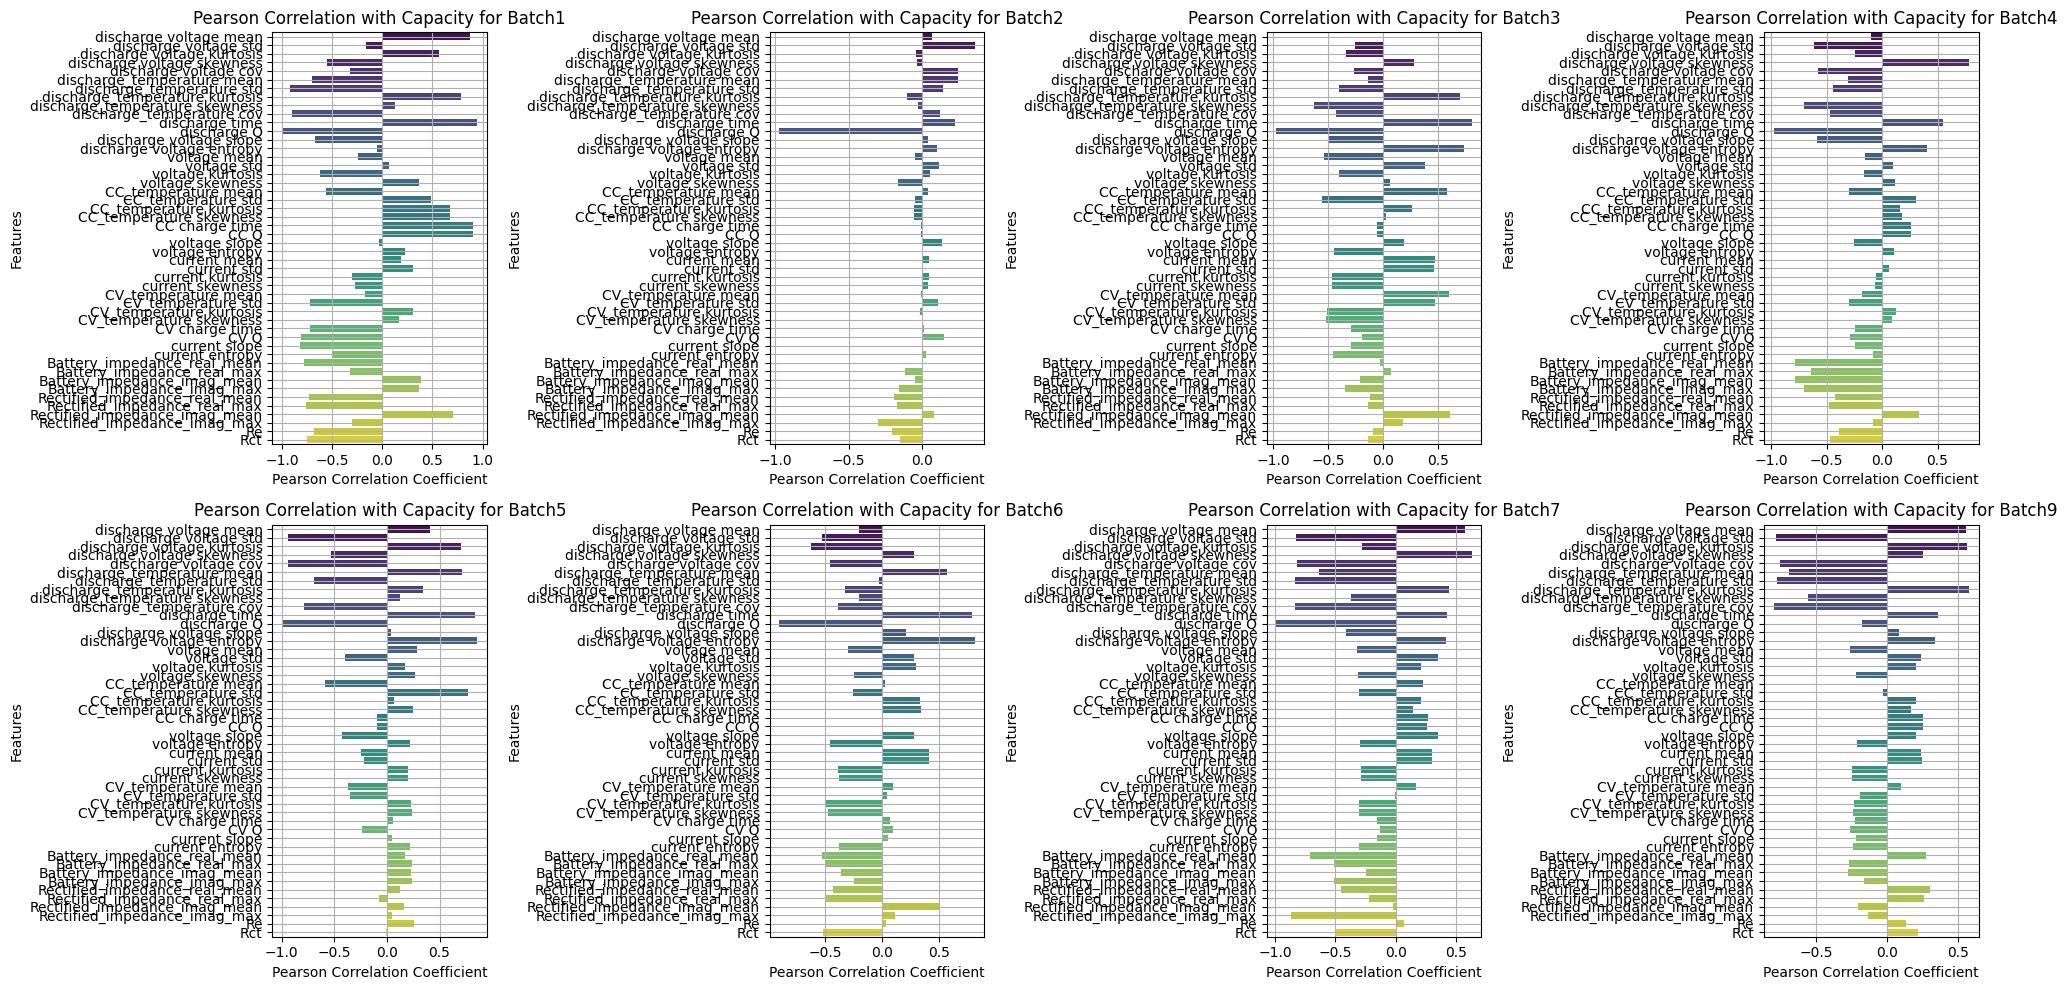

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

def load_features(batch_folder):
    files = [f for f in os.listdir(batch_folder) if f.endswith('_Merged_discharge+charge+impedance.csv')]
    all_data = []

    for file in files:
        file_path = os.path.join(batch_folder, file)
        data = pd.read_csv(file_path)
        all_data.append(data)

    return pd.concat(all_data, ignore_index=True)

# Battery batch information
Batch = {
    'Batch1': ['B0005', 'B0006', 'B0007', 'B0018'],
    'Batch2': ['B0025', 'B0026', 'B0027', 'B0028'],
    'Batch3': ['B0029', 'B0030', 'B0031', 'B0032'],
    'Batch4': ['B0033', 'B0034', 'B0036'],
    'Batch5': ['B0038', 'B0039', 'B0040'],
    'Batch6': ['B0041', 'B0042', 'B0043', 'B0044'],
    'Batch7': ['B0045', 'B0046', 'B0047', 'B0048'],
    'Batch9': ['B0053', 'B0054', 'B0055', 'B0056']
}

# Set the output folder path
output_folder = '/Users/jonathanzha/Desktop/Battery-dataset-preprocessing-code-library/NASA/MergedOutput'

# Create a 2x4 subplot for plotting
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Process each batch and plot the correlation matrix
for idx, batch_name in enumerate(Batch):
    batch_folder = os.path.join(output_folder, batch_name)
    if os.path.exists(batch_folder):
        batch_data = load_features(batch_folder)
        
        # Compute the Pearson correlation matrix
        correlation_matrix = batch_data.corr()
        
        # Extract the correlation with capacity
        if 'capacity' in correlation_matrix.columns:
            pearson_corr = correlation_matrix['capacity'].drop('capacity')
        
            # Plot the correlation with capacity
            sns.barplot(x=pearson_corr.values, y=pearson_corr.index, palette="viridis", ax=axes[idx])
            axes[idx].set_title(f'Pearson Correlation with Capacity for {batch_name}')
            axes[idx].set_xlabel('Pearson Correlation Coefficient')
            axes[idx].set_ylabel('Features')
            axes[idx].grid(True)  # Add grid lines for better readability
        else:
            print(f"Column 'capacity' not found in the data for {batch_name}")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Pearson Correlation Matrix:
                                discharge voltage mean  discharge voltage std  \
discharge voltage mean                        1.000000              -0.356793   
discharge voltage std                        -0.356793               1.000000   
discharge voltage kurtosis                    0.558646              -0.166588   
discharge voltage skewness                   -0.761164              -0.070307   
discharge voltage cov                        -0.534648               0.978133   
discharge_temperature mean                    0.028116              -0.331527   
discharge_temperature std                    -0.462833               0.274054   
discharge_temperature kurtosis                0.483671              -0.111826   
discharge_temperature skewness               -0.031856               0.494109   
discharge_temperature cov                    -0.633667               0.707988   
discharge time                                0.053822              -0.211685   


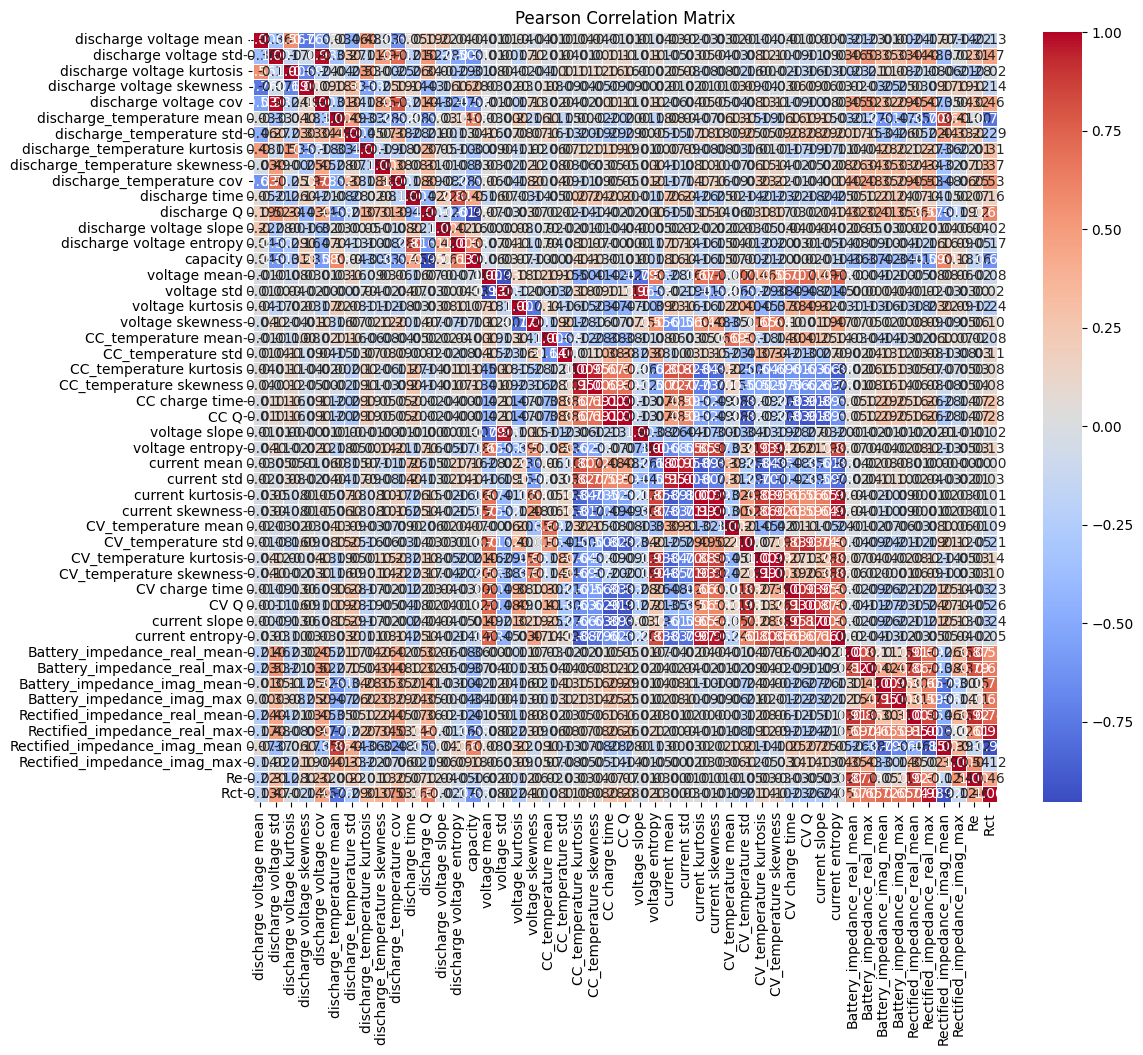

/var/folders/rx/sf9l7p51187c9twd53tg_ss00000gn/T/ipykernel_12172/2940005974.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pearson_corr.values, y=pearson_corr.index, palette="viridis")


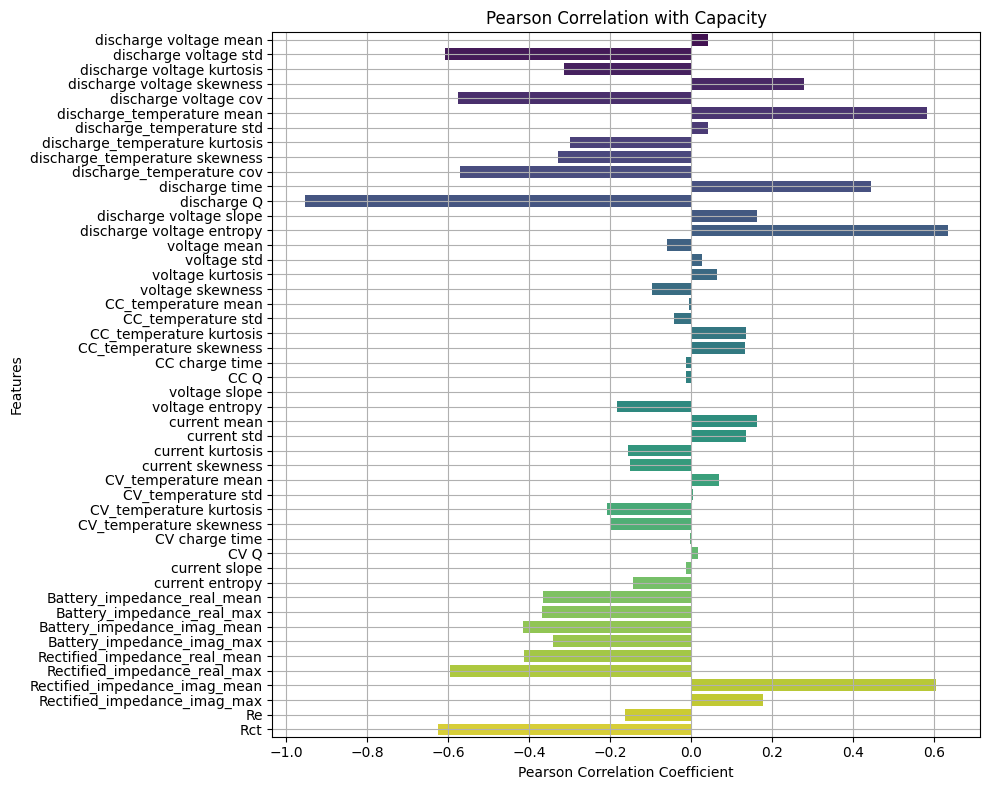

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Battery batch information
Batch1 = ['B0005', 'B0006', 'B0007', 'B0018']
Batch2 = ['B0025', 'B0026', 'B0027', 'B0028']
Batch3 = ['B0029', 'B0030', 'B0031', 'B0032']
Batch4 = ['B0033', 'B0034', 'B0036']
Batch5 = ['B0038', 'B0039', 'B0040']
Batch6 = ['B0041', 'B0042', 'B0043', 'B0044']
Batch7 = ['B0045', 'B0046', 'B0047', 'B0048']
Batch9 = ['B0053', 'B0054', 'B0055', 'B0056']

Batch = {'Batch1': Batch1, 'Batch2': Batch2, 'Batch3': Batch3, 'Batch4': Batch4, 'Batch5': Batch5, 'Batch6': Batch6, 'Batch7': Batch7,  'Batch9': Batch9}

# Set the output folder path
output_folder = '/Users/jonathanzha/Desktop/Battery-dataset-preprocessing-code-library/NASA/MergedOutput'

all_data = []

# Load features from all batches
for batch in Batch:
    batch_folder = os.path.join(output_folder, batch)
    if os.path.exists(batch_folder):
        files = [f for f in os.listdir(batch_folder) if f.endswith('_Merged_discharge+charge+impedance.csv')]
        for file in files:
            file_path = os.path.join(batch_folder, file)
            data = pd.read_csv(file_path)
            all_data.append(data)

# Combine all data into one DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# Compute the Pearson correlation matrix
correlation_matrix = combined_data.corr()

# Display the correlation matrix
print("Pearson Correlation Matrix:")
print(correlation_matrix)

# Plotting the Pearson correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pearson Correlation Matrix')
plt.show()

# Plotting the Pearson correlation coefficients for 'capacity'
if 'capacity' in combined_data.columns:
    pearson_corr = correlation_matrix['capacity'].drop('capacity')

    plt.figure(figsize=(10, 8))
    sns.barplot(x=pearson_corr.values, y=pearson_corr.index, palette="viridis")
    plt.title('Pearson Correlation with Capacity')
    plt.xlabel('Pearson Correlation Coefficient')
    plt.ylabel('Features')
    plt.grid(True)  # Add grid lines for better readability
    plt.tight_layout()  # Adjust the layout to make room for the labels
    plt.show()
else:
    print("Column 'capacity' not found in the data.")


Pearson Correlation Matrix:
                                discharge voltage mean  discharge voltage std  \
discharge voltage mean                        1.000000              -0.622747   
discharge voltage std                        -0.622747               1.000000   
discharge voltage kurtosis                    0.758561              -0.073795   
discharge voltage skewness                   -0.712966              -0.007365   
discharge voltage cov                        -0.808312               0.964001   
discharge_temperature mean                   -0.811125               0.601087   
discharge_temperature std                    -0.991667               0.608385   
discharge_temperature kurtosis                0.965357              -0.618435   
discharge_temperature skewness                0.155239              -0.189937   
discharge_temperature cov                    -0.965333               0.561367   
discharge time                                0.976776              -0.503438   


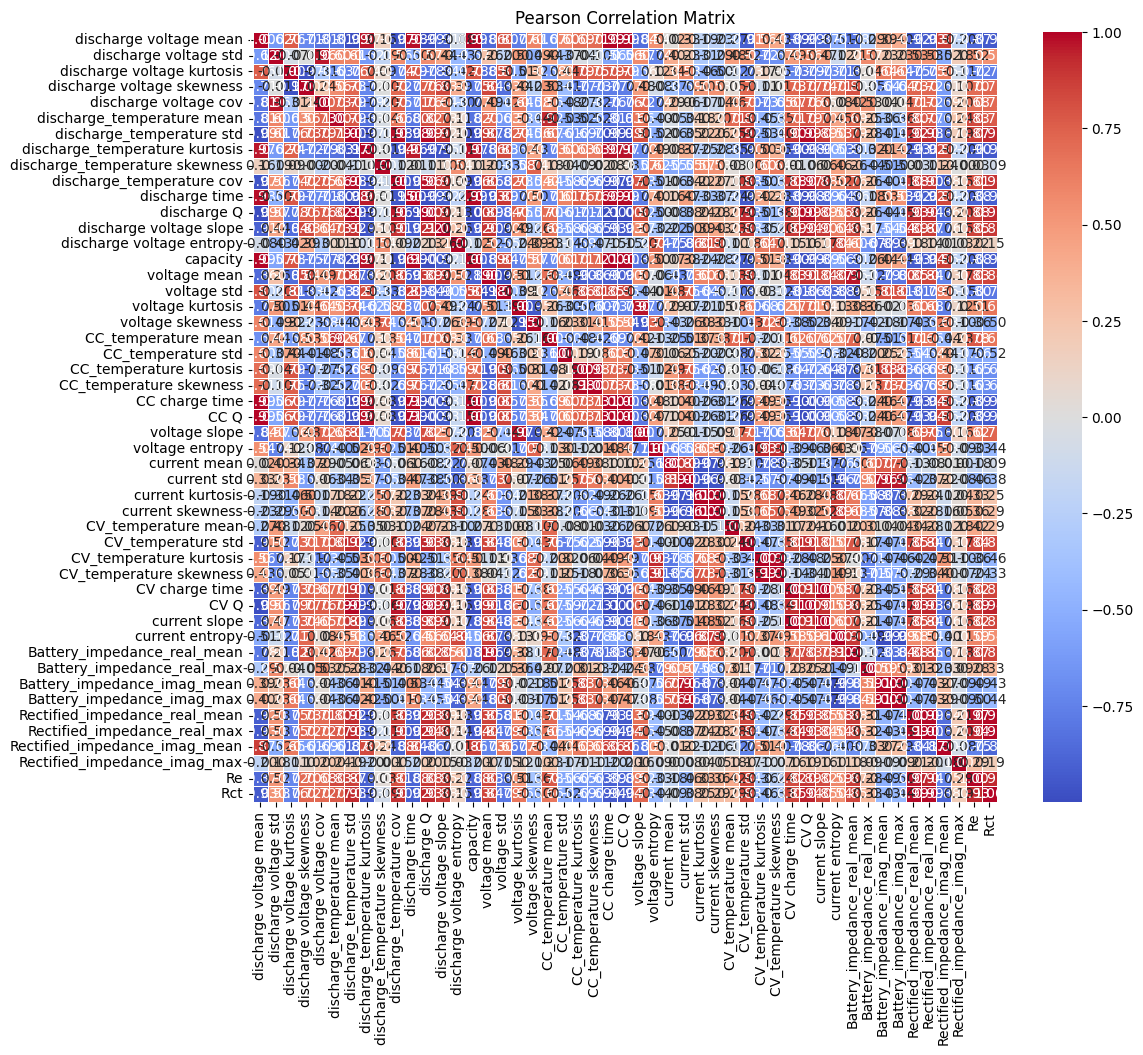

/var/folders/rx/sf9l7p51187c9twd53tg_ss00000gn/T/ipykernel_12172/3326392074.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pearson_corr.values, y=pearson_corr.index, palette="viridis")


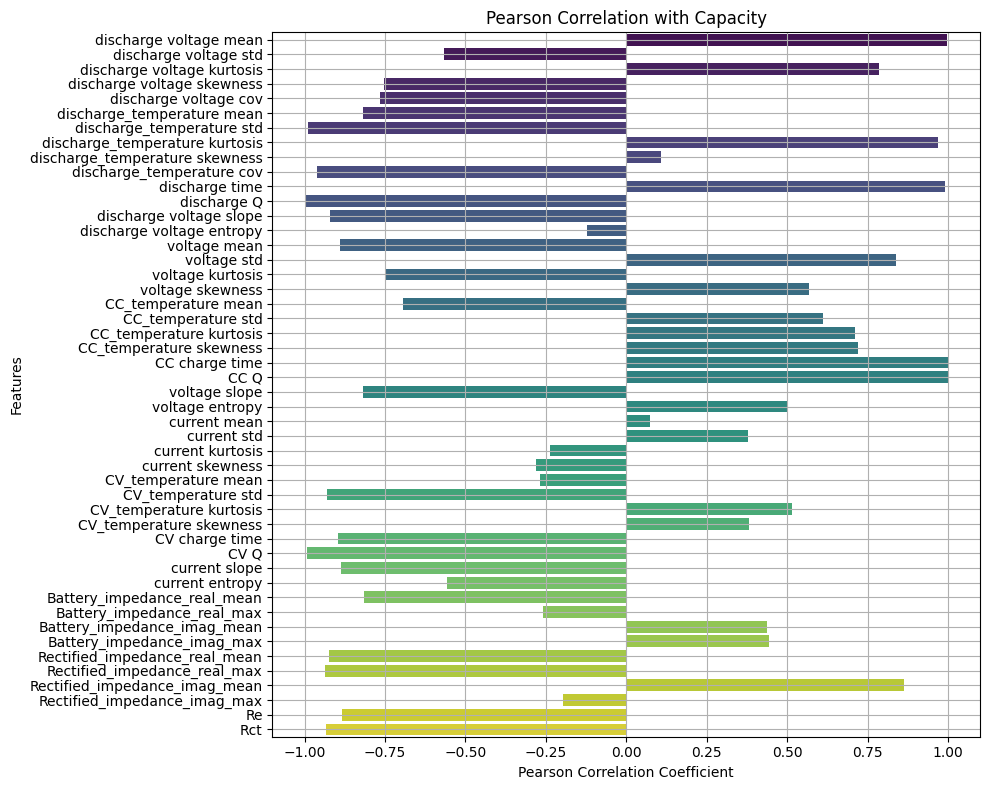

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Path to the merged CSV file
file_path = '/Users/jonathanzha/Desktop/Battery-dataset-preprocessing-code-library/NASA/MergedOutput/Batch1/B0005_Merged_discharge+charge+impedance.csv'

# Load the data
data = pd.read_csv(file_path)

# Compute the Pearson correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print("Pearson Correlation Matrix:")
print(correlation_matrix)

# Plotting the Pearson correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pearson Correlation Matrix')
plt.show()

# Plotting the Pearson correlation coefficients for 'capacity'
if 'capacity' in data.columns:
    pearson_corr = correlation_matrix['capacity'].drop('capacity')

    plt.figure(figsize=(10, 8))
    sns.barplot(x=pearson_corr.values, y=pearson_corr.index, palette="viridis")
    plt.title('Pearson Correlation with Capacity')
    plt.xlabel('Pearson Correlation Coefficient')
    plt.ylabel('Features')
    plt.grid(True)  # Add grid lines for better readability
    plt.tight_layout()  # Adjust the layout to make room for the labels
    plt.show()
else:
    print("Column 'capacity' not found in the data.")
